In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_excel('glass.csv.xlsx')
df.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
x=df.iloc[:,[1,2,3,4,5,6,7,8,9]].values
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [ ]:
y=df["Type"]
y=np.array(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [ ]:
dbscan=DBSCAN()
dbscan.fit(x)

DBSCAN()

In [ ]:
pca=PCA(n_components=7).fit(x)
pca_1=pca.transform(x)

In [ ]:
pca_1.shape

(214, 7)

In [ ]:
dbscan.labels_

array([-1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  1,
        0, -1,  0,  0, -1,  0,  0,  0,  0, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1,  3, -1,  2,  2, -1, -1,  3, -1,  3,  3, -1, -1,  2,
        3,  2,  2, -1, -1, -1,  2,  2,  2,  2], dtype=int64)

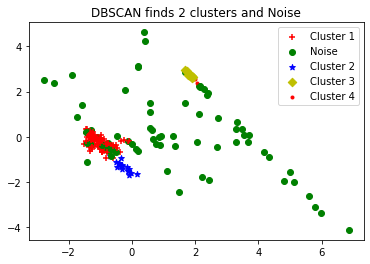

In [ ]:
# Plot based on Class
for i in range(0, pca_1.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_1[i, 0], pca_1[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == -1:
        c2 = plt.scatter(pca_1[i, 0], pca_1[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 1:
        c3 = plt.scatter(pca_1[i, 0], pca_1[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == 2:
        c4 = plt.scatter(pca_1[i, 0], pca_1[i, 1], c='y', marker='D')
    elif dbscan.labels_[i] == 3:
        c5 = plt.scatter(pca_1[i, 0], pca_1[i, 1], c='r', marker='.')

plt.legend([c1, c2, c3, c4,c5], ['Cluster 1', 'Noise', 'Cluster 2','Cluster 3','Cluster 4'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

# hirerachical

In [ ]:
import sklearn.preprocessing as pp
import scipy.cluster.hierarchy as shc
import nbformat

In [ ]:
scaler = pp.StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = pp.normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,-0.056641,-0.047953,-0.048867,0.118744,-0.040429,0.017930,-0.002312,-0.061381,-0.081430,-0.029082,-0.093360
std,0.381434,0.288683,0.288403,0.310001,0.282218,0.287475,0.170497,0.271280,0.217146,0.378067,0.312133
min,-0.750928,-0.550638,-0.779102,-0.595861,-0.729044,-0.645751,-0.385699,-0.491186,-0.316944,-0.583876,-0.590184
25%,-0.343445,-0.236938,-0.271861,-0.141449,-0.241471,-0.219258,-0.154345,-0.240675,-0.200163,-0.299359,-0.332679
50%,0.000066,-0.100549,-0.061748,0.257821,-0.065618,0.085075,0.042516,-0.086704,-0.147773,-0.164510,-0.210837
75%,0.292883,0.116437,0.183359,0.319212,0.151296,0.223266,0.086365,0.074412,-0.089725,0.223417,0.074670
max,0.623421,0.695551,0.639036,0.661546,0.629221,0.598068,0.857508,0.685240,0.792213,0.911775,0.660915


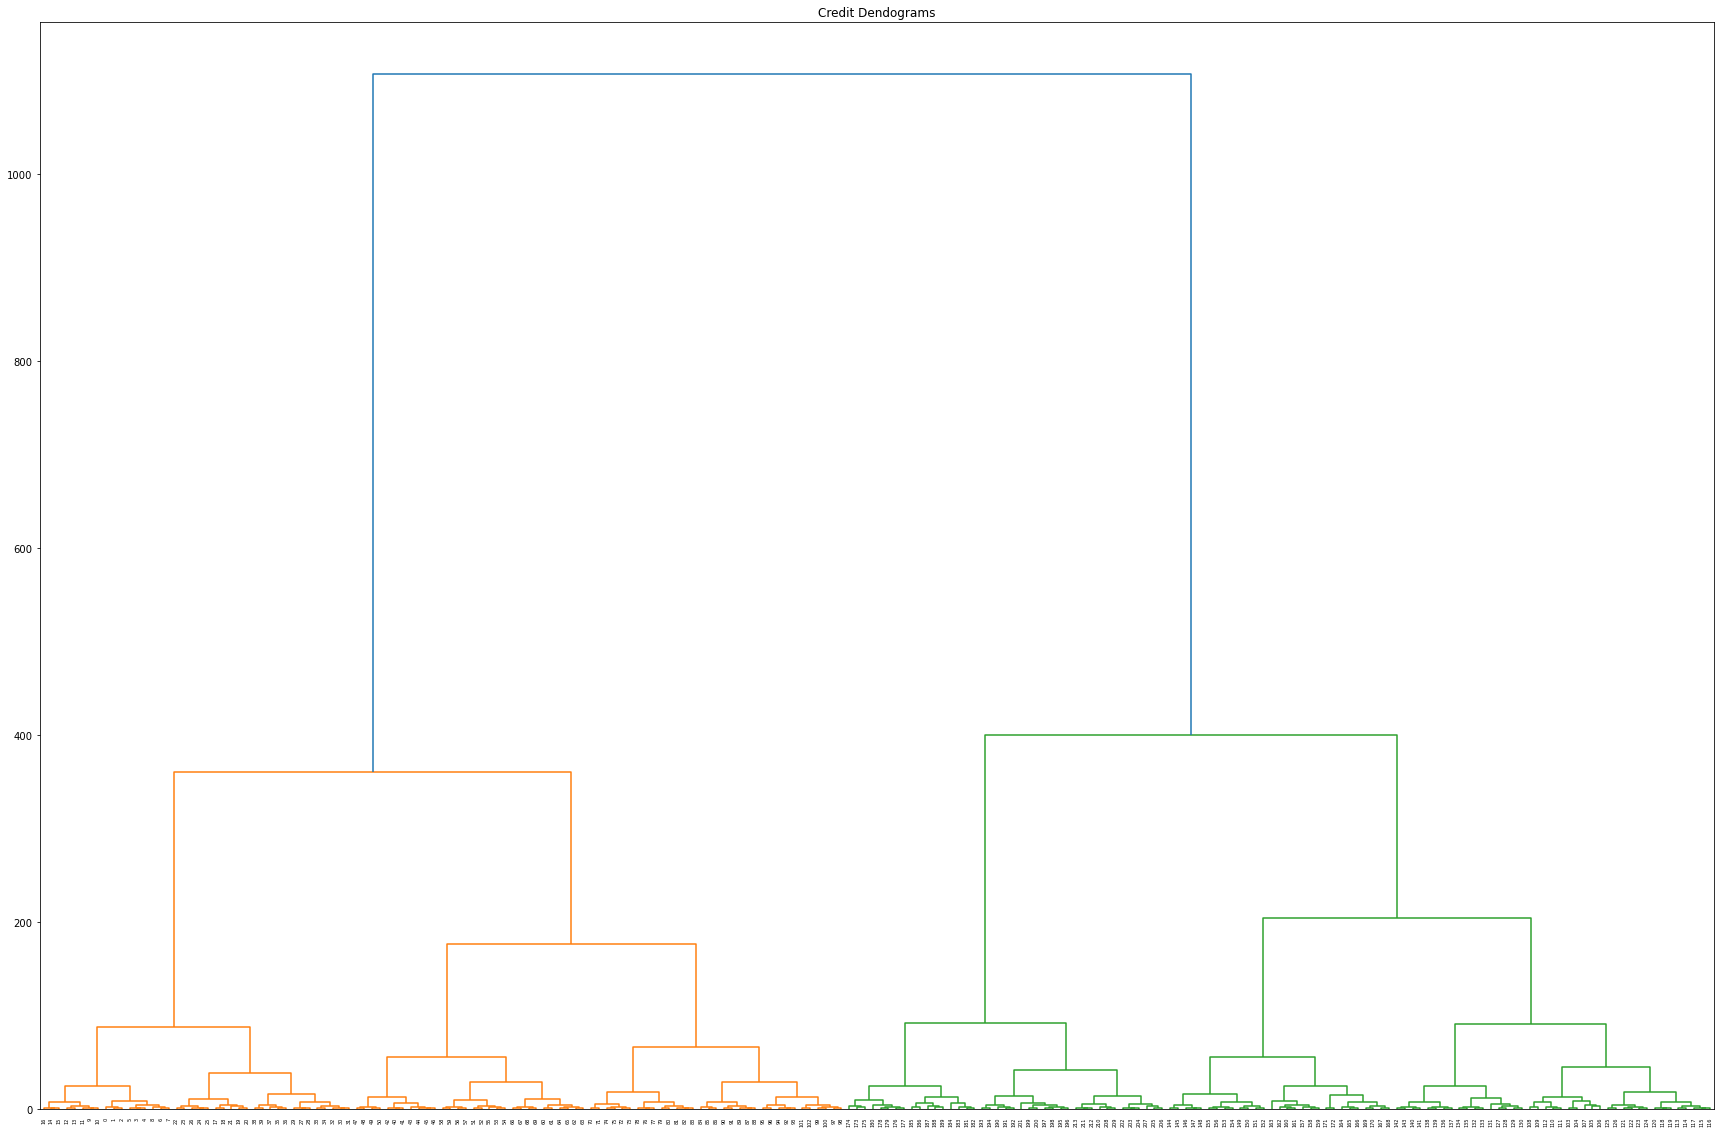

In [ ]:
plt.figure(figsize=(30,20))
plt.title("Credit Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.show()

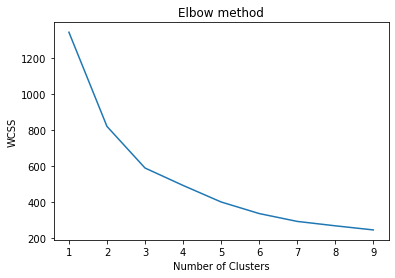

In [ ]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(pca_1) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

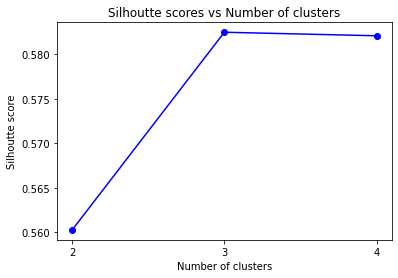

In [ ]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(pca_1, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(pca_1)

print('Silhoutte score of our model is ' + str(silhouette_score(pca_1, kmeans.labels_)))

Silhoutte score of our model is 0.5602628011615023
